In [2]:
%matplotlib inline

In [3]:
import random
import re
from pathlib import Path
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [4]:
def first(x):
  try: return next(iter(x))
  except StopIteration: return None

def plot_function(f, min=-2, max=2, figsize=(8,6)):
  x = torch.linspace(min,max)
  fig,ax = plt.subplots(figsize=figsize)
  ax.plot(x,f(x))


In [5]:
  torch.random.manual_seed(42)

In [6]:
acts = torch.randn((5,2))*2

In [7]:
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347]])

In [8]:
(acts[:,0] - acts[:,1]).sigmoid() # Ideal case when there are two possible clssifications

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959])

In [9]:
# now we need a function that will take care of more than 2 columns
def softmax(x): return torch.exp(x)/torch.exp(x).sum(dim=0, keepdim=True)    ### you missed torch.exp

In [10]:
from math import exp
print(exp(0.6734))

1.960893035830261


In [11]:
soft = softmax(acts)
soft

tensor([[0.0220, 0.2330],
        [0.0180, 0.2854],
        [0.0012, 0.1240],
        [0.9305, 0.0503],
        [0.0283, 0.3073]])

In [12]:
soft = softmax(acts)   ### We have to mention to mention dim everytime.
soft 

tensor([[0.0220, 0.2330],
        [0.0180, 0.2854],
        [0.0012, 0.1240],
        [0.9305, 0.0503],
        [0.0283, 0.3073]])

In [13]:
soft = torch.softmax(acts, dim =1)
soft

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  


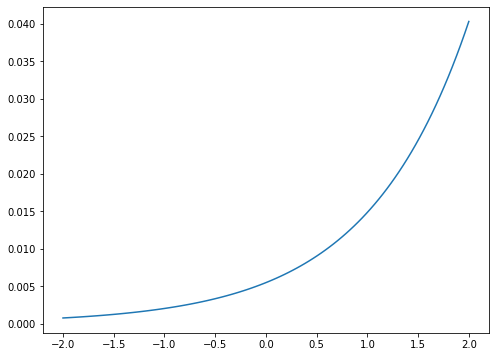

In [14]:
 plot_function(softmax) ### changed dim = 1 to dim = 0

In [15]:
targets = torch.tensor([0,1,0,1,1])

In [16]:
soft

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041]])

In [17]:
idx = range(5)
soft[idx, targets]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041])

In [18]:
df = pd.DataFrame(soft.numpy(), columns=['Benign', 'Malignant'])
df['targ'] = targets.numpy()
df['idx'] = idx
df['loss'] = soft[idx, targets]

In [19]:
df

,Benign,Malignant,targ,idx,loss
0,0.602469,0.397531,0,0,0.602469
1,0.502065,0.497935,1,1,0.497935
2,0.133188,0.866811,0,2,0.133188
3,0.996640,0.003360,1,3,0.003360
4,0.595949,0.404051,1,4,0.404051


In [20]:
loss_func = nn.CrossEntropyLoss()

In [21]:
loss_func(acts, targets)

tensor(1.9644)

In [22]:
nn.CrossEntropyLoss(reduction='none')(acts, targets)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062])